In [1]:
import pandas as pd
import numpy as np


import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

%matplotlib inline

import networkx as nx

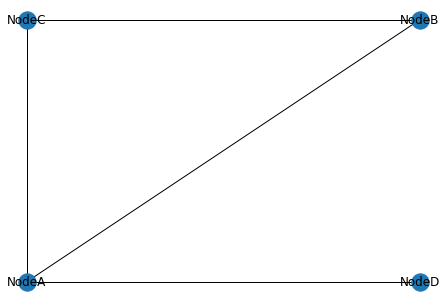

In [9]:
#그래프 객체 생성
G = nx.Graph()

#노드 설정
G.add_node('NodeA')
G.add_node('NodeB')
G.add_node('NodeC')
G.add_node('NodeD')

#엣지설정
G.add_edge('NodeA', 'NodeB')
G.add_edge('NodeA', 'NodeC')
G.add_edge('NodeB', 'NodeC')
G.add_edge('NodeA', 'NodeD')

#좌표설정
pos = {}
pos['NodeA'] = (0,0)
pos['NodeB'] = (1,1)
pos['NodeC'] = (0,1)
pos['NodeD'] = (1,0)


#그리기
nx.draw(G,pos, with_labels=True)

plt.show()

In [2]:
#데이터 불러오기
df_w = pd.read_csv('network_weight.csv')
df_p = pd.read_csv('network_pos.csv')


In [6]:
df_w

,A,B,C,D,E
0,0.639921,0.143353,0.944669,0.521848,0.000000
1,0.264556,0.000000,0.456150,0.568434,0.000000
2,0.617635,0.612096,0.616934,0.943748,0.000000
3,0.000000,0.000000,0.697631,0.060225,0.666767
4,0.670638,0.210383,0.000000,0.315428,0.000000


In [4]:
df_p

,A,B,C,D,E
0,0,0,2,2,1
1,0,2,0,2,1


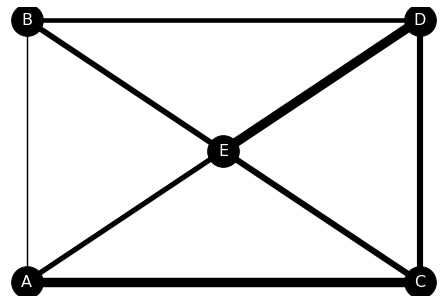

In [8]:

# edge 가중치 리스트화
size = 10
edge_weights = []
for i in range(len(df_w)):
    for j in range(len(df_w.columns)):
        edge_weights.append(df_w.iloc[i][j]*size)


#그래프 객체 생성
G = nx.Graph()

#노드 설정
for i in range(len(df_w.columns)):
    G.add_node(df_w.columns[i])
    
    
#엣지 설정
for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        G.add_edge(df_w.columns[i], df_w.columns[j])
        
        
#좌표 설정
pos = {}
for i in range(len(df_w.columns)):
    node = df_w.columns[i]
    pos[node] = (df_p[node][0], df_p[node][1])
    
#그리기
nx.draw(G, pos, with_labels= True, font_size = 16, node_size=1000, node_color='k', font_color='w', width=edge_weights)

plt.show()